In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy 

from MicroTools import unfolder
from MicroTools.TemplateTools import mcmc_signal
from MicroTools.TemplateTools import miniboone_fit as mbfit

from MicroTools.InclusiveTools import inclusive


from MicroTools.TemplateTools import template_analysis as templ

from MicroTools.plot_tools import *

PATH_MCMC_CHAINS = 'MicroTools/mcmc_results'
PATH_PLOTS = 'plots/'

In [73]:
import yaml
NEW_DATA_RELEASE_PATH = 'MicroTools/muB_data/inclusive_data/DataRelease_v2/'

with open(f"{NEW_DATA_RELEASE_PATH}/nueCC_FC_eff.yaml", "r") as stream:
    try:
        data = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
        
with open(f"{NEW_DATA_RELEASE_PATH}/nueCC_PC_eff.yaml", "r") as stream:
    try:
        data_PC = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [ ]:
eff_src = data['dependent_variables'][0]['values']
enu_src = data['independent_variables'][0]['values']
eff = []
enu_c =[]
for enu,val in zip(enu_src,eff_src):
    enu_c.append((enu['low'] + enu['high'])/2)    
    eff.append(val['value'])

In [75]:
eff_src_PC = data_PC['dependent_variables'][0]['values']
enu_src_PC = data_PC['independent_variables'][0]['values']
eff_PC = []
enu_c_PC =[]
for enu_PC,val_PC in zip(enu_src_PC,eff_src_PC):
    enu_c_PC.append((enu_PC['low'] + enu_PC['high'])/2)    
    eff_PC.append(val_PC['value'])

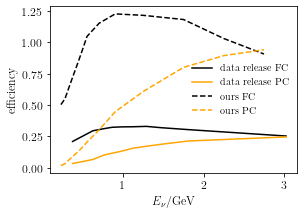

In [80]:
bin_edges_true = np.array([200, 250, 300, 350, 400, 450, 500, 600, 800, 1000, 1500, 2000, 2500, 3000]) # Bin edges after unfolding [MeV]

our_bin_c = (bin_edges_true[1:] + bin_edges_true[:-1])/2*1e-3

our_efficiency_PC = np.array([0.01514732, 0.03039166, 0.06088035, 0.09020686, 0.11837119, 0.15031587,
                             0.20390339, 0.30090062, 0.44590193, 0.60864919, 0.80104988, 0.89476233,
                             0.9417476])
our_efficiency = np.array([0.50314466, 0.54882715, 0.64019214, 0.72976845, 0.81755608, 0.90826832,
                             1.04872359, 1.15368084, 1.22829937, 1.21671845, 1.18336647, 1.03151614,
                             0.90760706])



plt.plot(enu_c, eff,label='data release FC', color='black')
plt.plot(enu_c_PC, eff_PC,label='data release PC', color='orange')


plt.plot(our_bin_c, our_efficiency,label='ours FC', ls='--', color='black')
plt.plot(our_bin_c, our_efficiency_PC,label='ours PC', ls='--', color='orange')
plt.xlabel(r"$E_\nu$/GeV")
plt.ylabel(r"efficiency")
plt.plot()
plt.legend()


In [64]:
smearing_matrix_microB = np.loadtxt(f"MicroTools/muB_data/unfolding_data/Migration_1eX_PC.txt")
our_eff_smear = np.sum(smearing_matrix_microB, axis=0)

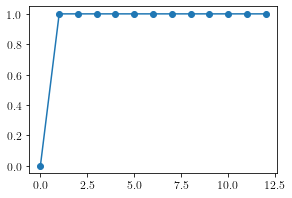

In [67]:
plt.plot(our_eff_smear,marker='o')